In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD

#Select GPU if can
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        print(e)

1 Physical GPU, 1 Logical GPU


2024-04-07 14:49:59.908983: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-07 14:49:59.909031: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-07 14:49:59.909039: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-07 14:49:59.909449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-07 14:49:59.910150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten train data
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
# Reshape data to 3 dims for augmentation method
x_train = x_train.reshape(x_train.shape[0], 28*28, 1, 1)
x_test = x_test.reshape(x_test.shape[0], 28*28, 1, 1)

In [10]:
# Convert the data to a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Augment data
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    return image, label
train_dataset = train_dataset.map(augment)


In [14]:
#Final model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28*28,1,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#Fit model
history = model.fit(
    train_dataset.batch(32),
    validation_data=test_dataset.batch(32),
    epochs=25)


Epoch 1/25
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3165 - accuracy: 0.9092 - val_loss: 0.1530 - val_accuracy: 0.9549
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1539 - accuracy: 0.9549 - val_loss: 0.1176 - val_accuracy: 0.9620
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1125 - accuracy: 0.9672 - val_loss: 0.0968 - val_accuracy: 0.9716
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0917 - accuracy: 0.9722 - val_loss: 0.0879 - val_accuracy: 0.9733
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0761 - accuracy: 0.9763 - val_loss: 0.0877 - val_accuracy: 0.9735
Epoch 6/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0783 - val_accuracy: 0.9763
Epoch 7/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0780 - val_acc

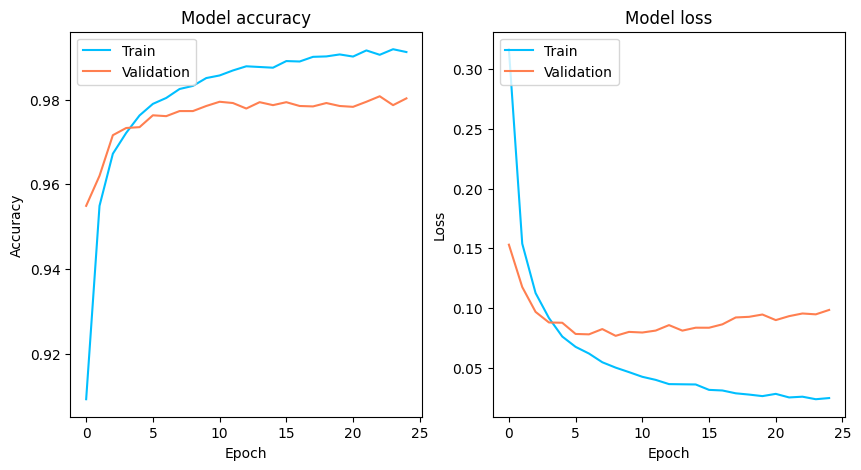

In [16]:
#Plot learnring curve
def plot_learning_curve(hist):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    train_color = '#00bfff'  # Deep sky blue
    val_color = '#ff7f50'    # Coral


    axs[0].plot(hist.history['accuracy'], color=train_color)
    axs[0].plot(hist.history['val_accuracy'], color=val_color)
    axs[0].set_title('Model accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')

    axs[1].plot(hist.history['loss'], color=train_color)
    axs[1].plot(hist.history['val_loss'], color=val_color)
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curve(history)

In [ ]:
model.summary()